### 1. Code chơi với ma trận

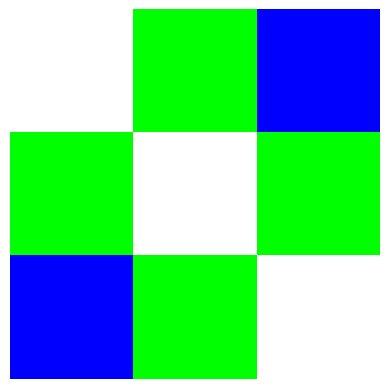

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample image matrix (3D array)
image = np.array([
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]],
    [[0, 255, 0], [255, 0, 0], [0, 255, 0]],
    [[0, 0, 255], [0, 255, 0], [255, 0, 0]]
])

# Filter for the color red (condition: red channel is 255, green channel is 0, blue channel is 0)
condition = (image[:, :, 0] == 255) & (image[:, :, 1] == 0) & (image[:, :, 2] == 0)

# Apply the filter by setting the filtered color to white (255, 255, 255)
filtered_image = np.where(condition[..., np.newaxis], [255, 255, 255], image)

# Display the filtered image
plt.imshow(filtered_image)
plt.axis('off')
plt.show()


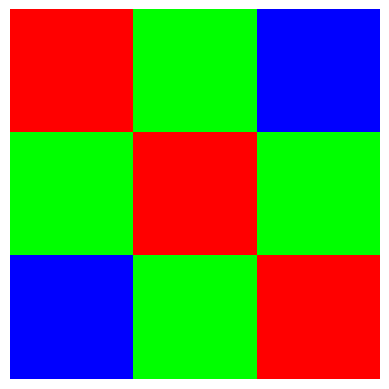

In [2]:
plt.imshow(image)
plt.axis('off')
plt.show()


### 2. Code chơi với ngôn ngữ tự nhiên

In [8]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.0 MB/s eta 0:00:00


In [9]:
from transformers import BertTokenizer, BertModel
import torch
from scipy.spatial.distance import cosine

# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)

# Define two example documents
document1 = "The cat sat on the mat"
document2 = "The dog played in the garden"

# Tokenize and encode the documents
inputs = tokenizer([document1, document2], padding=True, truncation=True, return_tensors='pt')

# Get the BERT embeddings for the documents
with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state

# Calculate the cosine similarity between the document embeddings
embedding1 = embeddings[0].mean(dim=0)
embedding2 = embeddings[1].mean(dim=0)
similarity = 1 - cosine(embedding1, embedding2)

print(f"Similarity between the documents: {similarity}")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Similarity between the documents: 0.7820572853088379


### 3. Code chơi với hình ảnh

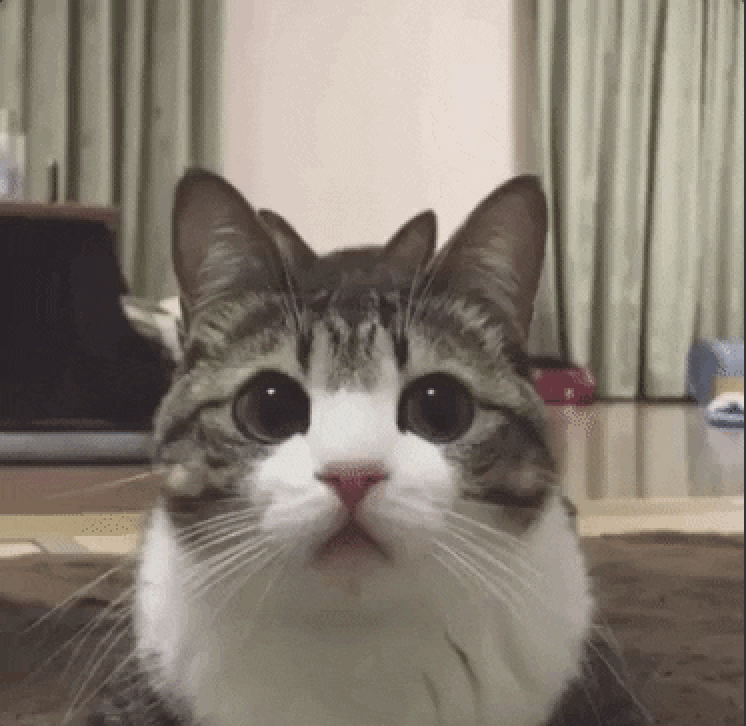

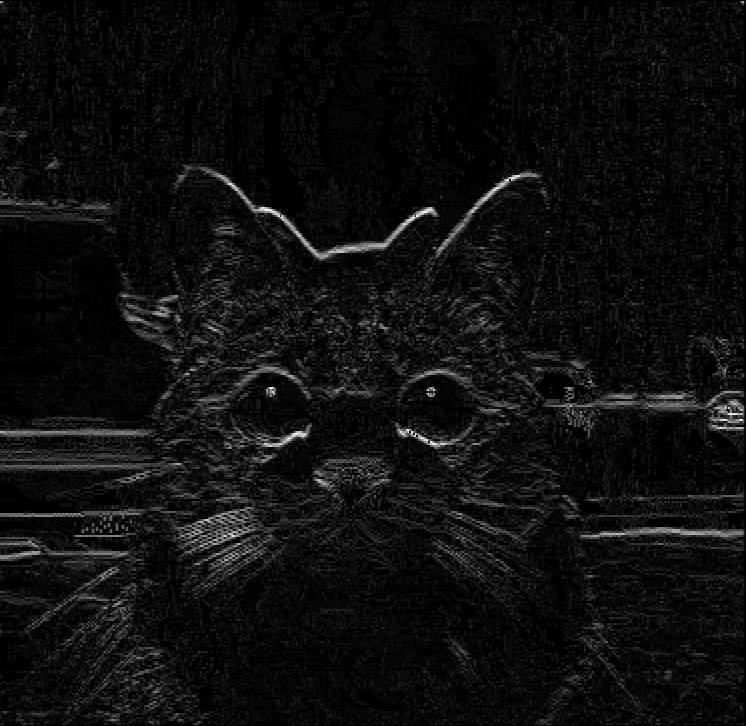

In [14]:
import cv2
import numpy as np

def apply_sobel_y(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Sobel operator in the y-direction
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Rescale the result to 0-255 and convert back to uint8
    sobel_y = np.uint8(np.absolute(sobel_y))
    
    return sobel_y

# Load the image
image_path = './cat.png'
image = cv2.imread(image_path)

# Apply Sobel operator in the y-direction
sobel_y_image = apply_sobel_y(image)
from google.colab.patches import cv2_imshow
# Display the original and resulting images
cv2_imshow(image)
cv2_imshow(sobel_y_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Filter đẹp hơn

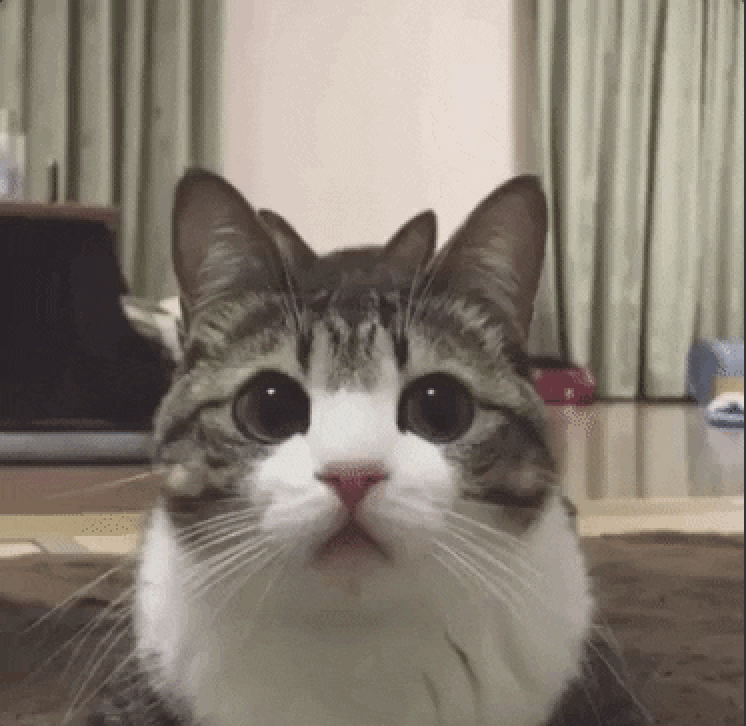

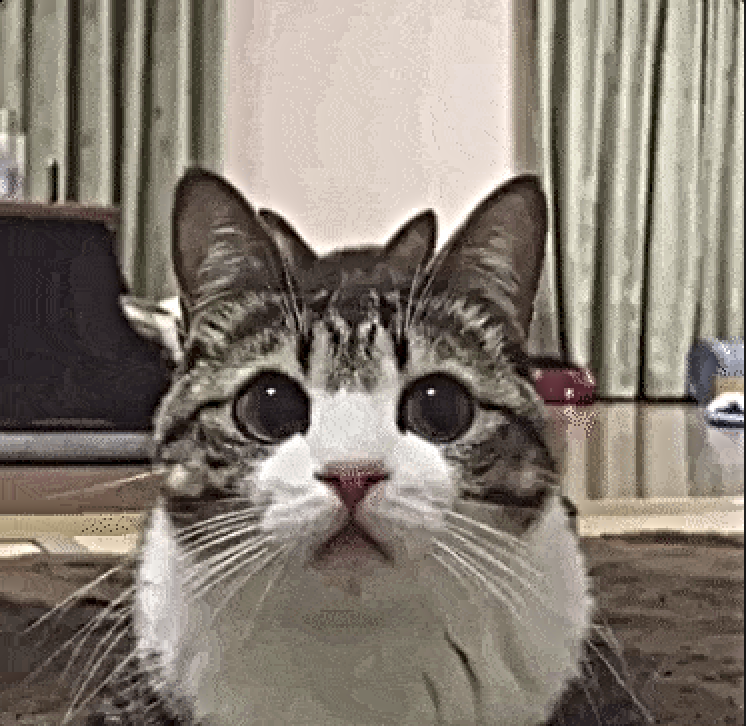

In [17]:
import cv2
import numpy as np

def apply_beautiful_filter(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply bilateral filter
    filtered_image = cv2.bilateralFilter(gray, 9, 75, 75)
    
    # Apply color enhancement
    enhanced_image = cv2.detailEnhance(image, sigma_s=10, sigma_r=0.15)
    
    return enhanced_image

# Load the image
image_path = './cat.png'
image = cv2.imread(image_path)

# Apply the beautiful filter
beautiful_image = apply_beautiful_filter(image)

# Display the original and filtered images
cv2_imshow(image)
cv2_imshow(beautiful_image)
cv2.waitKey(0)
cv2.destroyAllWindows()